# PROJET SPEED DATING - LISE GNOS

In this project I chose to focus on the way people's perception is affected by their speed dating experience.

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', 220)

In [4]:
df = pd.read_csv('src/Speed Dating Data.csv', encoding='iso-8859-1')

In [5]:
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [6]:
df.shape

(8378, 195)

In [20]:
df.describe(include='all')

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,...,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,8378.000000,8368.000000,8378.000000,8220.000000,8378.000000,8274.000000,8305.000000,8289.000000,8289.000000,8289.000000,8280.000000,8271.000000,8249.000000,8378.000000,8166.000000,8091.000000,8072.000000,8018.000000,7656.000000,7302.000000,8128.000000,8060.000000,7993.000000,8283.000000,8315,8296.000000,4914,3133,3583,8315.000000,8299.000000,8299.000000,8299,7314,4279,8299.000000,8281.000000,8299.000000,8289,8240.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,8299.000000,...,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.000000,5775.00000,5775.000000,5775.000000,5775.000000,5775.000000,7463.000000,7463.000000,7463.000000,7463.000000,7463.000000,4377.000000,4377.000000,4377.000000,4377.000000,4377.000000,3974.000000,3974.000000,3974.000000,1496.000000,668.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2959.000000,2016.000000,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,259,NaN,241,68,115,NaN,NaN,NaN,269,409,261,NaN,NaN,NaN,367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Business,NaN,UC Berkeley,"1,400.00","26,908.00",NaN,NaN,NaN,New York,0,"55,080.00",NaN,NaN,NaN,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,521,NaN,107,403,241,NaN,NaN,NaN,522,355,124,NaN,NaN,NaN,202,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,8.963595,283.863767,0.164717,0.196010,0.395799,26.364999,2.756653,22.495347,17.396867,20.270759,1

In [30]:
df.isnull().sum().to_frame().T

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,0,1,0,0,0,0,0,0,1846,0,0,10,0,158,0,104,73,89,89,89,98,107,129,0,212,287,306,360,722,1076,250,318,385,95,63,82,3464,5245,4795,63,79,79,79,1064,4099,79,97,79,89,138,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,79,101,6578,79,79,79,89,99,121,1889,1889,1889,1889,1889,1911,79,79,79,79,89,89,105,105,105,105,105,3472,3472,3472,3472,3472,0,202,277,296,350,712,1067,240,309,375,1173,4282,4282,4282,4282,4282,4282,4378,4378,4378,4378,4378,915,915,945,6394,6423,6394,6394,6423,6404,933,915,915,915,915,915,2603,2603,2603,2603,2603,2603,2603,2603,2603,2603,2603,2603,915,915,915,915,915,4001,4001,4001,4001,4001,4404,4404,4404,6882,7710,4404,4404,4404,4404,4404,4404,6362,6362,6362,6362,6362,6362,5419,5419,5419,5419,5419,5419,5419,5419,5419,5419,5419,6362,4404,4404,4404,4404,4404,6362,6362,6362,6362,6362


In [32]:
#df[['from']].loc[:250,:].value_counts()

Storytelling : do people see themselves in the same way as other people see them ?
Bien vérifier à chaque fois que la somme = 100
décalage entre les attributs pour un date et ce que l'on recherche vraiment chez l'autre ?
y a-t-il une station number plus favorable ?
est-ce que les personnes qui ont l'habitude des dates sont plus justes sur la perception d'elles-mêmes ?
différence de perception entre homme et femme ?
plus de matchs if samerace ?
faire la disribution de l'age => prendre between 21 and 34
vérifier combien de fois les personnes ont fait du speed dating, ce qui peut influencer aussi leur perception
faire une animation plotly express pout montrer l'évolution de la perception au cours des étapes

In [50]:
df['gender'].unique()

array([0, 1])

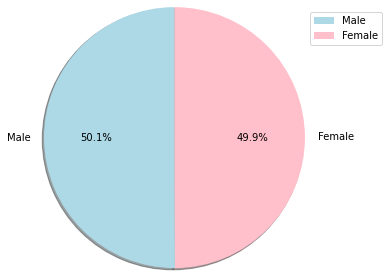

In [73]:
genders = df['gender'].apply(lambda x: 
                               "Female" if x==0 
                               else "Male" if x == 1
                               else "Missing")
df_pie = genders.value_counts()

plt.figure()
plt.pie(df_pie.values, labels=df_pie.index,
       autopct='%1.1f%%',
        colors = ['lightblue', 'pink'],
       shadow=True, 
       startangle=90,
       radius=1.5
       )
plt.legend(bbox_to_anchor=(1.1, 1.1))
plt.show()

In [10]:
df['age'].isna().sum()

95

In [78]:
df_temp = df.groupby(by = ['iid', 'age', 'gender', 'wave']).sum()

In [79]:
df_temp.head()
#vérifier en faisant groupby si on a bcp de valeurs manquantes en étape 3 ou pas

,,,,id,idg,condtn,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
iid,age,gender,wave,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,21.0,0,1,10.0,10,10,100,70,0.0,55,55,155.0,4,2.67,1,252.0,23.0,442.33,79.11,165.11,169.11,45.11,99.22,5,67.0,74.0,80.0,72.0,80.0,71.0,68.5,57.0,19.0,10.0,40.0,20.0,40.0,20.0,70.0,10.0,0.0,90.0,20.0,80.0,90.0,10.0,10.0,50.0,10.0,50.0,60.0,90.0,10.0,100.0,100.0,90.0,80.0,10.0,30.0,20.0,150.0,200.0,200.0,150.0,150.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,350.0,200.0,150.0,200.0,50.0,50.0,60.0,80.0,80.0,80.0,70.0,0.0,0.0,0.0,0.0,0.0,8,57.0,73.0,73.0,68.0,63.0,65.0,65.0,53.0,16.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,20.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,194.4,166.7,138.9,222.2,111.1,166.7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,60.0,70.0,80.0,70.0,60.0,0.0,0.0,0.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0,150.0,200.0,200.0,150.0,150.0,150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,70.0,70.0,70.0,70.0,0.0,0.0,0.0,0.0,0.0
2,24.0,0,1,20.0,30,10,100,30,0.0,55,55,155.0,2,2.58,8,252.0,23.0,442.33,79.11,165.11,169.11,45.11,99.22,6,77.0,71.0,79.0,75.0,75.0,65.0,76.0,55.0,19.0,10.0,20.0,20.0,50.0,10.0,50.0,10.0,0.0,30.0,20.0,70.0,100.0,80.0,60.0,30.0,50.0,80.0,100.0,10.0,90.0,80.0,70.0,80.0,30.0,10.0,40.0,50.0,450.0,50.0,250.0,200.0,0.0,50.0,0.0,0.0,0.0,0.0,0.0,0.0,650.0,0.0,100.0,250.0,0.0,0.0,70.0,50.0,100.0,80.0,30.0,0.0,0.0,0.0,0.0,0.0,4,64.0,70.0,77.0,61.0,65.0,57.0,66.0,59.0,19.0,30.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0,20.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,189.2,189.2,216.2,270.3,54.1,81.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,60.0,80.0,90.0,40.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,300.0,50.0,400.0,150.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.0,60.0,90.0,90.0,40.0,0.0,0.0,0.0,0.0,0.0
3,25.0,0,1,30.0,50,10,100,90,0.0,55,55,155.0,0,-1.36,8,252.0,23.0,442.33,79.11,165.11,169.11,45.11,99.22,5,65.0,71.0,73.0,62.0,64.0,54.0,60.0,45.0,19.0,20.0,20.0,80.0,40.0,60.0,30.0,10.0,0.0,30.0,80.0,70.0,80.0,50.0,50.0,80.0,40.0,50.0,70.0,80.0,70.0,70.0,70.0,50.0,80.0,70.0,40.0,20.0,350.0,100.0,350.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,500.0,0.0,200.0,300.0,0.0,0.0,80.0,90.0,80.0,90.0,80.0,0.0,0.0,0.0,0.0,0.0,0,81.0,86.0,94.0,77.0,88.0,81.0,82.0,56.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [76]:
df_temp.isnull().sum().to_frame().T

,id,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,field_cd,race,imprace,imprelig,goal,date,go_out,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


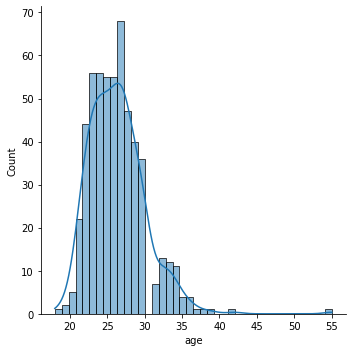

In [77]:
sns.displot(data=df_temp, x='age', kde=True, bins=40)

In [48]:
#sns.catplot(y ='match', x="age", kind = "box", data=df_temp)
#faire en violon

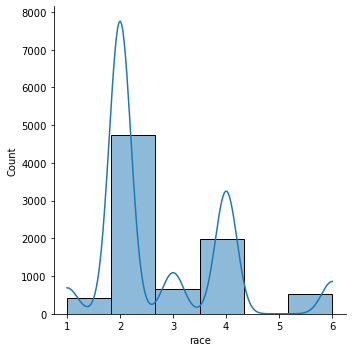

In [18]:
sns.displot(data=df, x='race', kde=True, bins=6)

In [20]:
df[['match', 'field_cd']].corr()

,match,field_cd
match,1.000000,-0.024641
field_cd,-0.024641,1.000000


In [10]:
df['match'].unique()

array([0, 1])

In [11]:
dc = df.iloc[:,:100]

In [12]:
dc.columns

Index(['iid', 'id', 'gender', 'idg', 'condtn', 'wave', 'round', 'position',
       'positin1', 'order', 'partner', 'pid', 'match', 'int_corr', 'samerace',
       'age_o', 'race_o', 'pf_o_att', 'pf_o_sin', 'pf_o_int', 'pf_o_fun',
       'pf_o_amb', 'pf_o_sha', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o',
       'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o', 'age', 'field',
       'field_cd', 'undergra', 'mn_sat', 'tuition', 'race', 'imprace',
       'imprelig', 'from', 'zipcode', 'income', 'goal', 'date', 'go_out',
       'career', 'career_c', 'sports', 'tvsports', 'exercise', 'dining',
       'museums', 'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv',
       'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga',
       'exphappy', 'expnum', 'attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1',
       'amb1_1', 'shar1_1', 'attr4_1', 'sinc4_1', 'intel4_1', 'fun4_1',
       'amb4_1', 'shar4_1', 'attr2_1', 'sinc2_1', 'intel2_1', 'fun2_1',
       'amb2_1', 'shar2_1', 'attr3_1', 'si

In [13]:
corr = dc.corr()

In [14]:
abs(corr['match']).sort_values(ascending = False)

match      1.000000
dec_o      0.522326
dec        0.521943
like_o     0.305853
fun_o      0.277700
             ...   
id         0.000770
idg        0.000544
gender     0.000530
theater    0.000087
amb2_1     0.000028
Name: match, Length: 92, dtype: float64

In [15]:
#f, ax = plt.subplots(figsize=(9, 6))
#sns.heatmap(corr, annot=True, ax=ax)

In [16]:
df['like_o'].head()

0     7.0
1     8.0
2    10.0
3     7.0
4     8.0
Name: like_o, dtype: float64

What types of skills make a match most plausible? Let's have a look at the evaluation of skills in the scorecard filled out by subjects after each "date" during the event :

In [21]:
df['attr'].head()

0    6.0
1    7.0
2    5.0
3    7.0
4    5.0
Name: attr, dtype: float64

In [17]:
dscore = df[['match', 'dec_o', 'attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o', 'met_o']]
dscore.head()
# /!\ dec_o et attr_o viennent du partenaire, à modifier

,match,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o
0,0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0
1,0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0
2,1,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0
3,1,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0
4,1,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0


match      1.000000
dec_o      0.522326
like_o     0.305853
fun_o      0.277700
shar_o     0.270840
attr_o     0.260837
prob_o     0.255574
intel_o    0.169448
sinc_o     0.164523
amb_o      0.139927
met_o      0.106569
Name: match, dtype: float64

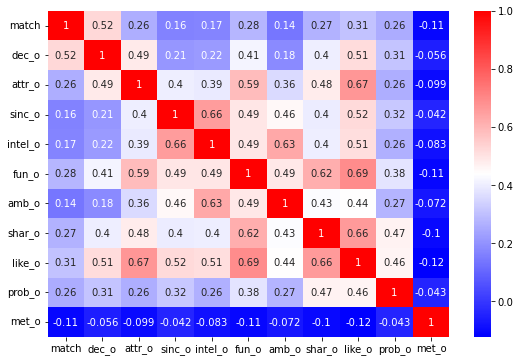

In [18]:
corr = dscore.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(corr, annot=True, ax=ax, cmap='bwr')
abs(corr['match']).sort_values(ascending = False)

The match is first correlated to the decision of the subjects. It is quite obvious because the match happens when the 2 subjects both take a yes decision. In the same way, the like_o parameter represents an overall feeling of the person, which is very important for the decision.
Apart from that, the most important skills for a match are : Fun, Shared Interests/Hobbies, Attractive, much before Sincere, Intelligent and Ambitious. It is important to notice that the prob_o parameter plays a great role for a match. It corresponds to : How probable do you think it is that this person will say 'yes' for you? It seems that the subjects don't dare to like a person who could potentially don't like them. Let's try to verify this hypothesis !

/opt/conda/lib/python3.9/site-packages/statsmodels/compat/pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


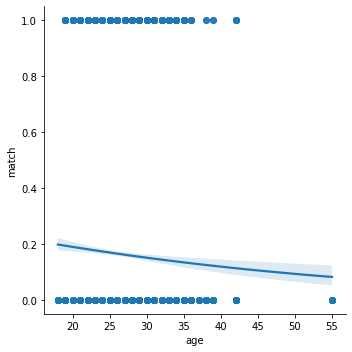

In [19]:
sns.lmplot(x="age", y="match", data= df, logistic = True)